# COMP41680 Assignment 2 - Task 2 and 3
## Student Name: Sanika Kulkarni     Student ID: 21200060

The objective of this assignment is to scrape a collection of product reviews from a set of web pages, preprocess the data, and evaluate the performance of different classifiers in the context of two related text classification tasks: 
- Predicting review sentiment (Task 2)
- Predicting review helpfulness (Task 3)

### Task 2: Review Sentiment Classification

**Steps to follow:**
-  Load the data and create a set of documents, one per review. Each document should consist of the concatenation of the review’s title and body text.
-  Assign a class label (“positive” or “negative”) to each review. We will assume that 1-star to 3-star reviews are “negative”, and 4-star to 5-star reviews are “positive”.
-  Apply appropriate preprocessing steps to create a numeric representation of the documents, suitable for classification.
-  Build two different binary classification models using two classifiers of your choice, to distinguish between “positive” and “negative” reviews.
-  Compare the performance of the classification models using an appropriate evaluation strategy. Report and discuss the evaluation results.

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import nltk
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer,TfidfVectorizer

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay,roc_auc_score,roc_curve
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings("ignore")

### 1. Reading the scraped data

In [2]:
reviews = pd.read_csv("product_reviews.csv")
reviews

,Title,Review,Star_ratings,Helpfulness
0,The herbs were great...but the cherry tomatoe...,The herb kit that came with my Aerogarden was ...,2-star,15 out of 17 users found this review helpful
1,Even more useful than regular parchment paper,I originally bought this just because it was c...,5-star,19 out of 19 users found this review helpful
2,Shake it before you bake it,"If you do it in reverse (bake before shaking),...",2-star,2 out of 13 users found this review helpful
3,Not what the picture describes,I bought this steak for my father in law for C...,2-star,7 out of 14 users found this review helpful
4,What a ripe off - GIVE ME A BREAK,Sorry but I had these noodles and they are no ...,2-star,10 out of 34 users found this review helpful
...,...,...,...,...
5541,Ovaltine has changed their formula,Ovaltine has updated their packaging and chang...,1-star,25 out of 27 users found this review helpful
5542,Perhaps too compostable?,I bought these bags to go with Trading ECO-200...,3-star,20 out of 21 users found this review helpful
5543,"Nutiva Organic Shelled Hempseed, 5-Pound Bag",This item was brought up in a forum with a lin...,5-star,22 out of 26 users found this review helpful
5544,This gum is really great!,If you have problems with Aspartame (which is ...,5-star,17 out of 17 users found this review helpful


### Creating a document by combining title and body of the review

In [3]:
reviews_2 = reviews.copy()
reviews_2['Document(Title + Body)'] = reviews['Title'] + '. ' + reviews['Review']
reviews_2['Document(Title + Body)'][1]

'\xa0Even more useful than regular parchment paper. I originally bought this just because it was cheaper than the regular parchment paper in the grocery store. I was therefore very pleasantly surprised to find out that it\'s actually much more useful than regular parchment paper. The silicone non-stick coating is no joke. Before I got this, I would often line pans with aluminum foil and spray them with oil to roast peppers, cook frozen samosas, etc. Now, I instead just lay the food on top of a piece of parchment paper, and the non-stick coating makes oil unnecessary. And, this paper is *much* cheaper than aluminum foil. Two things to note: at 13" wide, it\'s a couple of inches narrower than most regular parchment paper. Also, unlike most grocery store brands, it doesn\'t have a metal band to help you tear off sheets. (They claim that you can use the cardboard edge to do that, but it doesn\'t work.) But 13" is plenty for almost everything I do. And using scissors to cut the paper is a s

In [4]:
reviews_2.drop(['Title','Review','Helpfulness'],axis=1,inplace=True) #Since we do not need these columns
reviews_2

,Star_ratings,Document(Title + Body)
0,2-star,The herbs were great...but the cherry tomatoe...
1,5-star,Even more useful than regular parchment paper...
2,2-star,Shake it before you bake it. If you do it in ...
3,2-star,Not what the picture describes. I bought this...
4,2-star,What a ripe off - GIVE ME A BREAK. Sorry but ...
...,...,...
5541,1-star,Ovaltine has changed their formula. Ovaltine ...
5542,3-star,Perhaps too compostable?. I bought these bags...
5543,5-star,"Nutiva Organic Shelled Hempseed, 5-Pound Bag...."
5544,5-star,This gum is really great!. If you have proble...


### 2. Assigning labels (“positive” or “negative”) to each review
We will assume that 1-star to 3-star reviews are “negative”, and 4-star to 5-star reviews are “positive”.

In [5]:
reviews_2['Star_ratings'].replace(to_replace =["1-star", "2-star", "3-star"], value ="negative", inplace= True)
reviews_2['Star_ratings'].replace(to_replace =["4-star", "5-star"], value ="positive", inplace= True)
reviews_2['label'] = reviews_2['Star_ratings']
reviews_2.drop('Star_ratings',axis=1,inplace=True)
reviews_2

,Document(Title + Body),label
0,The herbs were great...but the cherry tomatoe...,negative
1,Even more useful than regular parchment paper...,positive
2,Shake it before you bake it. If you do it in ...,negative
3,Not what the picture describes. I bought this...,negative
4,What a ripe off - GIVE ME A BREAK. Sorry but ...,negative
...,...,...
5541,Ovaltine has changed their formula. Ovaltine ...,negative
5542,Perhaps too compostable?. I bought these bags...,negative
5543,"Nutiva Organic Shelled Hempseed, 5-Pound Bag....",positive
5544,This gum is really great!. If you have proble...,positive


### Checking if our dataset is balanced

I am checking the number of data points per class to see if the data is balanced. 
In this case, it is fairly balanced.

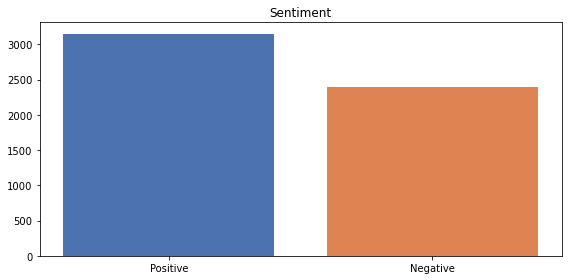

In [6]:
colors = sns.color_palette('deep')

plt.figure(figsize=(8,4), tight_layout=True)
plt.bar(x=['Positive', 'Negative'],
        height=reviews_2.value_counts(['label']),
        color=colors[:2])
plt.title('Sentiment')
plt.show()

### 3. Preprocessing the data 

Text classification problems like sentimental analysis uses classifiers and algorithms that expect numerical feature vectors rather than raw text documents. This is why we need to turn our review data into numerical vectors.
These are majorly divided into two main categories:
-  Bag of words Model - Each document can be represented as a term vector based on frequency of the terms and a document term matrix is created
- TD-IDF Model - Weighing based approach

**Limitations of Bag-of-Words:**
-  For large documents, the vectors would be of large sizes and would also have too many null values leading to the creation of sparse vectors.
- Does not bring in any information on the meaning of the text

Unlike, bag-of-words, tf-idf creates a normalized count where each word count is divided by the number of documents this word appears in.

bow(w, d) = # times word w appears in document d.
tf-idf(w, d) = bow(w, d) x N / (# documents in which word w appears)

where N is the total number of documents. The fraction (N / (# documents in which word w appears)) is known as inverse document frequency.


### Splitting the data into train and test sets

It is important to split the data into training and testing sets before vectorization in order to prevent data leakage and give a proper approximation of the algorithmic accuracy at production level.

In [7]:
target = reviews_2['label']
target =  target.values.tolist()
reviews_2.drop('label',inplace=True, axis=1)
X_train, X_test, y_train, y_test = train_test_split(reviews_2,target, test_size = 0.2, random_state = 1)

In [8]:
print("The number of training samples are: " ,(X_train.shape[0]))
print("The number of test samples are: " ,(X_test.shape[0]))

The number of training samples are:  4436
The number of test samples are:  1110


In [9]:
X_train

,Document(Title + Body)
4716,Different product than the photo. Since a DOP...
3479,Not as good as I had hoped. I've been hooked ...
2912,"Great seeds, need to wash and dry. The seeds ..."
3431,Non-Instant Dry Milk (tips). Even though I ju...
1673,"plain awful. When it comes to junk food, I us..."
...,...
905,"Review on TASTE. I'm writing this review, bec..."
5192,My tips for making this system work. We have ...
3980,Hey It's $6 per bottle apple juice!. Let's se...
235,"Little filling, disappointed in quality of pr..."


### Steps for preprocessing the data:

 - **Converting to lower case and Tokenization:**
 
It is a good practise to make sure all the words are in lower case since we do not need to know if the word appear at the beginning or the end of sentences. `CountVectorizer()` Converts all characters to lowercase before tokenizing by default.  

 -  **Stop Words Removal:**
 
Stop words are the set of commonly used words in a language like “a”, “the”, “is”, “are”, etc. Removing these low information words leads to better accuracy and makes the task less intensive by limiting the number of features the model learns.


 - **Stemming/lemmatization:**
 
Stemming just removes or stems the last few characters of a word, often leading to incorrect meanings and spelling. Lemmatization considers the context and converts the word to its meaningful base form, which is called Lemma. For example, If you lemmatize the word 'Caring', it would return 'Care'. If you stem, it would return 'Car' and this is erroneous. I will thus use lemmatization here.

 - **Vectorization and Term weighing:** This is done by applying TfidfVectorizer

### 1. Converting to lower case and Tokenization:

In [10]:
# convert to lowercase, then tokenize
X_train['Document(Title + Body)'] = X_train['Document(Title + Body)'].str.lower()
tokenize = CountVectorizer().build_tokenizer()
X_train['Tokens'] = X_train.apply(lambda row: tokenize(row['Document(Title + Body)']), axis=1)
print("Tokenised Training set of Documents:\n")
print(X_train.head())
print("\n\n")

#Use the same tokenizer for splitting the test data into tokens
X_test['Document(Title + Body)'] = X_test['Document(Title + Body)'].str.lower()
X_test['Tokens'] = X_test.apply(lambda row: tokenize(row['Document(Title + Body)']), axis=1)
print("Tokenised Testing set of Documents:\n")
print(X_test.head())

Tokenised Training set of Documents:

                                 Document(Title + Body)  \
4716   different product than the photo. since a dop...   
3479   not as good as i had hoped. i've been hooked ...   
2912   great seeds, need to wash and dry. the seeds ...   
3431   non-instant dry milk (tips). even though i ju...   
1673   plain awful. when it comes to junk food, i us...   

                                                 Tokens  
4716  [different, product, than, the, photo, since, ...  
3479  [not, as, good, as, had, hoped, ve, been, hook...  
2912  [great, seeds, need, to, wash, and, dry, the, ...  
3431  [non, instant, dry, milk, tips, even, though, ...  
1673  [plain, awful, when, it, comes, to, junk, food...  



Tokenised Testing set of Documents:

                                 Document(Title + Body)  \
1916   amazing grass amazing product!. i have been u...   
2445   hard salami lover. use to pick up at the mark...   
3252   wrong color. i ordered red roses fo

### 2. Removing Stop Words

In [11]:
# Getting a list of english stopwords
stopwords = text.ENGLISH_STOP_WORDS

#Defining a function to remove stopwords
def remove_stopwords(row):
    tokens = row['Tokens']
    # taken only words (not punctuation)
    tokens  = [w for w in tokens if w not in stopwords]
    
    return tokens

#Removing stopwords in training data
X_train['tokens_clean'] = X_train.apply(remove_stopwords, axis=1)
print("Tokenised Training set of Documents after stopword removal:\n")
print(X_train.head())
print("\n\n")


#Removing stopwords in testing data
X_test['tokens_clean'] = X_test.apply(remove_stopwords, axis=1)

print("Tokenised Testing set of Documents after stopword removal:\n")
print(X_test.head())

Tokenised Training set of Documents after stopword removal:

                                 Document(Title + Body)  \
4716   different product than the photo. since a dop...   
3479   not as good as i had hoped. i've been hooked ...   
2912   great seeds, need to wash and dry. the seeds ...   
3431   non-instant dry milk (tips). even though i ju...   
1673   plain awful. when it comes to junk food, i us...   

                                                 Tokens  \
4716  [different, product, than, the, photo, since, ...   
3479  [not, as, good, as, had, hoped, ve, been, hook...   
2912  [great, seeds, need, to, wash, and, dry, the, ...   
3431  [non, instant, dry, milk, tips, even, though, ...   
1673  [plain, awful, when, it, comes, to, junk, food...   

                                           tokens_clean  
4716  [different, product, photo, dop, product, read...  
3479  [good, hoped, ve, hooked, spearmint, tea, awhi...  
2912  [great, seeds, need, wash, dry, seeds, great, ...

### 3. Lemmatisation

In [12]:
lemmatizer = WordNetLemmatizer()
def get_lemmatizer_list(row):
    word_list = row['tokens_clean']
    lemmatized_word_list = [lemmatizer.lemmatize(word) for word in word_list]
    
    return lemmatized_word_list

#Lemmatizing training data
X_train['lemmatized_words'] = X_train.apply(get_lemmatizer_list, axis=1)
print("Training set Documents after lemmatization:\n")
print(X_train.head())
print("\n\n")


#Lemmatizing test data
X_test['lemmatized_words'] = X_test.apply(get_lemmatizer_list, axis=1)
print("Test set Documents after lemmatization:\n")
print(X_test.head())
print("\n\n")

Training set Documents after lemmatization:

                                 Document(Title + Body)  \
4716   different product than the photo. since a dop...   
3479   not as good as i had hoped. i've been hooked ...   
2912   great seeds, need to wash and dry. the seeds ...   
3431   non-instant dry milk (tips). even though i ju...   
1673   plain awful. when it comes to junk food, i us...   

                                                 Tokens  \
4716  [different, product, than, the, photo, since, ...   
3479  [not, as, good, as, had, hoped, ve, been, hook...   
2912  [great, seeds, need, to, wash, and, dry, the, ...   
3431  [non, instant, dry, milk, tips, even, though, ...   
1673  [plain, awful, when, it, comes, to, junk, food...   

                                           tokens_clean  \
4716  [different, product, photo, dop, product, read...   
3479  [good, hoped, ve, hooked, spearmint, tea, awhi...   
2912  [great, seeds, need, wash, dry, seeds, great, ...   
3431  [no

In [13]:
## make lemmatized words useable for tfidf vectorizer 
def get_strings_sentences(row):
    my_list = row['lemmatized_words']
    sentence = ' '.join(word for word in my_list)
    # print(sentence)
    return sentence

X_train['words'] = X_train.apply(get_strings_sentences, axis=1)
X_test['words'] = X_test.apply(get_strings_sentences, axis=1)

In [14]:
X_train.head()

,Document(Title + Body),Tokens,tokens_clean,lemmatized_words,words
4716,different product than the photo. since a dop...,"[different, product, than, the, photo, since, ...","[different, product, photo, dop, product, read...","[different, product, photo, dop, product, read...",different product photo dop product readily av...
3479,not as good as i had hoped. i've been hooked ...,"[not, as, good, as, had, hoped, ve, been, hook...","[good, hoped, ve, hooked, spearmint, tea, awhi...","[good, hoped, ve, hooked, spearmint, tea, awhi...",good hoped ve hooked spearmint tea awhile unav...
2912,"great seeds, need to wash and dry. the seeds ...","[great, seeds, need, to, wash, and, dry, the, ...","[great, seeds, need, wash, dry, seeds, great, ...","[great, seed, need, wash, dry, seed, great, qu...",great seed need wash dry seed great quality di...
3431,non-instant dry milk (tips). even though i ju...,"[non, instant, dry, milk, tips, even, though, ...","[non, instant, dry, milk, tips, just, did, rev...","[non, instant, dry, milk, tip, just, did, revi...",non instant dry milk tip just did review barry...
1673,"plain awful. when it comes to junk food, i us...","[plain, awful, when, it, comes, to, junk, food...","[plain, awful, comes, junk, food, usually, sti...","[plain, awful, come, junk, food, usually, stic...",plain awful come junk food usually stick ding ...


In [15]:
X_test.head()

,Document(Title + Body),Tokens,tokens_clean,lemmatized_words,words
1916,amazing grass amazing product!. i have been u...,"[amazing, grass, amazing, product, have, been,...","[amazing, grass, amazing, product, using, berr...","[amazing, grass, amazing, product, using, berr...",amazing grass amazing product using berry flav...
2445,hard salami lover. use to pick up at the mark...,"[hard, salami, lover, use, to, pick, up, at, t...","[hard, salami, lover, use, pick, market, could...","[hard, salami, lover, use, pick, market, could...",hard salami lover use pick market couldn fin o...
3252,wrong color. i ordered red roses for valentin...,"[wrong, color, ordered, red, roses, for, valen...","[wrong, color, ordered, red, roses, valentin, ...","[wrong, color, ordered, red, rose, valentin, d...",wrong color ordered red rose valentin day sent...
3793,good for toddlers. my butler gave me a tin of...,"[good, for, toddlers, my, butler, gave, me, ti...","[good, toddlers, butler, gave, tin, christmas,...","[good, toddler, butler, gave, tin, christmas, ...",good toddler butler gave tin christmas year ol...
1791,"cool, but flat. it's a cool little basket, an...","[cool, but, flat, it, cool, little, basket, an...","[cool, flat, cool, little, basket, stuff, insi...","[cool, flat, cool, little, basket, stuff, insi...",cool flat cool little basket stuff inside look...


### Drop columns that are unnessary

In [16]:
X_train.drop(['Document(Title + Body)','Tokens','tokens_clean','lemmatized_words'],axis=1,inplace=True)
X_test.drop(['Document(Title + Body)','Tokens','tokens_clean','lemmatized_words'],axis=1,inplace=True)

In [17]:
X_train.head()

,words
4716,different product photo dop product readily av...
3479,good hoped ve hooked spearmint tea awhile unav...
2912,great seed need wash dry seed great quality di...
3431,non instant dry milk tip just did review barry...
1673,plain awful come junk food usually stick ding ...


In [18]:
X_test.head()

,words
1916,amazing grass amazing product using berry flav...
2445,hard salami lover use pick market couldn fin o...
3252,wrong color ordered red rose valentin day sent...
3793,good toddler butler gave tin christmas year ol...
1791,cool flat cool little basket stuff inside look...


### 4. TF-IDF Vectorization 

It calculates two things: **term frequency** and **inverse document frequency**. 
- Term frequency= No. of times the word appears in the sample 
- IDF = log ( number of times the word appears in the sample / number of times the word appears in the whole document)

These TF and IDF values of each word for a specific sample are multiplied to obtain the feature vectors for that sample.

The importance increases proportionally to the number of times a word appears in the document but is offset by the frequency of the word in the corpus.

In [19]:
vectorizer = TfidfVectorizer(stop_words=stopwords, min_df = 3, max_df = 0.85)

#Fitting the transformer on training data and transforming it
X_train = vectorizer.fit_transform(X_train['words']) 

# Using the above fitted vectorizer to transform the test data
X_test = vectorizer.transform(X_test['words'])

terms = vectorizer.get_feature_names()
print("Vocabulary has %d distinct terms" % len(terms))

Vocabulary has 7514 distinct terms


In [20]:
terms = vectorizer.get_feature_names()
freqs = X_train.sum(axis=0)
sorted_term_indexes = freqs.argsort()
sorted_term_indexes = sorted_term_indexes[0, ::-1]
for i in range(20):
    term_index = sorted_term_indexes[0,i]
    print("%d. %s = %.2f" % ((i+1), terms[term_index], freqs[0,term_index] ))

1. product = 137.96
2. food = 121.75
3. coffee = 118.45
4. like = 117.48
5. taste = 108.84
6. good = 101.09
7. great = 95.75
8. tea = 90.43
9. just = 88.96
10. flavor = 87.88
11. dog = 81.08
12. cup = 80.92
13. superstore = 69.26
14. make = 65.67
15. love = 64.51
16. use = 64.45
17. price = 64.18
18. don = 64.18
19. buy = 64.04
20. bag = 63.84


We can see that the top words here are product, food, coffee, taste and so on. The `max_df` is used to remove corpus specific words and the `min_df` is used to remove words appearing rarely.

## Classification 

### Approach 1 - Logistic Regression

In [21]:
# Picking the best model by searching the hyperparameter space using GridSearchCV() with cv of 10
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
model_1=LogisticRegression()
logreg_cv=GridSearchCV(model_1,grid,cv=10)
logreg_cv.fit(X_train,y_train)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 10.0, 'penalty': 'l2'}
accuracy : 0.8586505806031767


In [22]:
# Building a model
model_1 = LogisticRegression(C=10,penalty="l2")
model_1.fit(X_train, y_train)

#generating predictions
y_pred_lr = model_1.predict(X_test)
y_pred_lr 

array(['positive', 'positive', 'negative', ..., 'positive', 'negative',
       'negative'], dtype='<U8')

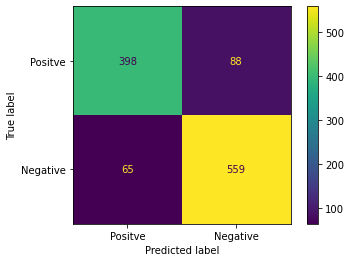

In [23]:
target_categories = ["Positve","Negative"]

# calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_lr)
# display it graphically
cmd = ConfusionMatrixDisplay(cm, display_labels=target_categories)
cmd.plot();

### Approach 2 - Random Forest Classifier

In [24]:
# Picking the best model by searching the hyperparameter space using GridSearchCV() with cv of 3 
grid = { 
    'n_estimators': [100, 200, 500],
    'criterion' :['gini', 'entropy']
}
model_2=RandomForestClassifier()
rfc_cv=GridSearchCV(model_2,grid,cv=3)
rfc_cv.fit(X_train,y_train)

print("tuned hpyerparameters :(best parameters) ",rfc_cv.best_params_)
print("accuracy :",rfc_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'entropy', 'n_estimators': 100}
accuracy : 0.843776637776259


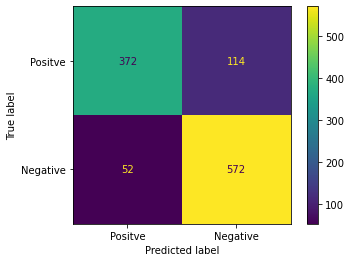

In [25]:
model_2 = RandomForestClassifier(n_estimators=100,criterion="entropy")
model_2.fit(X_train, y_train)

y_pred_rf = model_2.predict(X_test)

# calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)
cmd = ConfusionMatrixDisplay(cm, display_labels=target_categories)
cmd.plot();

## Comparison and Evaluation

In [26]:
print("\033[1mMetrics for Logistic Regression\033[0m")
print("\n")
print(classification_report(y_test, y_pred_lr, target_names=target_categories))

print("\n")
print("\033[1mMetrics for Random Forest\033[0m")
print("\n")
print(classification_report(y_test, y_pred_rf, target_names=target_categories))

Metrics for Logistic Regression


              precision    recall  f1-score   support

     Positve       0.86      0.82      0.84       486
    Negative       0.86      0.90      0.88       624

    accuracy                           0.86      1110
   macro avg       0.86      0.86      0.86      1110
weighted avg       0.86      0.86      0.86      1110



Metrics for Random Forest


              precision    recall  f1-score   support

     Positve       0.88      0.77      0.82       486
    Negative       0.83      0.92      0.87       624

    accuracy                           0.85      1110
   macro avg       0.86      0.84      0.85      1110
weighted avg       0.85      0.85      0.85      1110



### Results:

- The recall score for negative reviews is very good, meaning that most of the reviews model tags as negative are actually helpful.
- The recall score of the positve reviews is less for both. Logistic Regression however beats Random Forest in this case with a recall of 82% compared to that of 77% for Random Forest.
- Precision score for Random Forest is better for positve reviews. 
- Both algorithms perform well on the sentiment analysis task.


### Comparising LR and RF based on ROC AUC 

In [27]:
pred_prob1 = model_1.predict_proba(X_test)
pred_prob2 = model_2.predict_proba(X_test)


auc_1 = roc_auc_score(y_test, pred_prob1[:,1])
auc_2 = roc_auc_score(y_test, pred_prob2[:,1])

auc_scores = {}

print('AUC_Score for LR Classifier: %.2f%%' % (auc_1 * 100))
print('AUC_Score for RF Classifier: %.2f%%' % (auc_2 * 100))

auc_scores['LR'] = auc_1
auc_scores['RF'] = auc_2

AUC_Score for LR Classifier: 93.59%
AUC_Score for RF Classifier: 93.23%


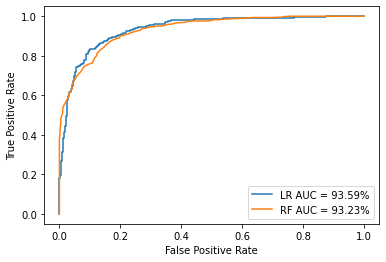

In [28]:
#Plotting the ROC curves 

fpr_1, tpr_1, _ = roc_curve(y_test,pred_prob1[:,1], pos_label = 'positive')
fpr_2, tpr_2, _ = roc_curve(y_test,pred_prob2[:,1], pos_label = 'positive')

plt.plot(fpr_1,tpr_1, label='LR AUC = %.2f%%'%(auc_scores['LR']*100))
plt.plot(fpr_2,tpr_2, label='RF AUC = %.2f%%'%(auc_scores['RF']*100))


plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

#### Both algorithms perform very similar and do quite well when it comes to classifying sentiments.

### Task 3 - Review Helpfulness Classification

- Assign a class label (“helpful” or “unhelpful”) based on its associated helpfulness information.
- Build two different binary classification models using two classifiers of your choice, to distinguish between “helpful” and “unhelpful” reviews.
- Compare the performance of the classification models using an appropriate evaluation strategy. Report and discuss the evaluation results.
- Based on the evaluation results from both Tasks 2 and 3, compare and discuss the differences in performance for the two classification tasks (i.e. sentiment and helpfulness classification).

In [29]:
reviews = pd.read_csv("product_reviews.csv")
reviews['Document(Title + Body)'] = reviews['Title'] + '. ' + reviews['Review']
reviews_3 = reviews[['Helpfulness','Document(Title + Body)']]
reviews_3

,Helpfulness,Document(Title + Body)
0,15 out of 17 users found this review helpful,The herbs were great...but the cherry tomatoe...
1,19 out of 19 users found this review helpful,Even more useful than regular parchment paper...
2,2 out of 13 users found this review helpful,Shake it before you bake it. If you do it in ...
3,7 out of 14 users found this review helpful,Not what the picture describes. I bought this...
4,10 out of 34 users found this review helpful,What a ripe off - GIVE ME A BREAK. Sorry but ...
...,...,...
5541,25 out of 27 users found this review helpful,Ovaltine has changed their formula. Ovaltine ...
5542,20 out of 21 users found this review helpful,Perhaps too compostable?. I bought these bags...
5543,22 out of 26 users found this review helpful,"Nutiva Organic Shelled Hempseed, 5-Pound Bag...."
5544,17 out of 17 users found this review helpful,This gum is really great!. If you have proble...


### 1. Assign a class label (“helpful” or “unhelpful”) based on its associated helpfulness information

To do this, I have followed the following steps:
- Split the Helpfulness column into tokens
- The 1st and 4th token shows the number of users who found the review helpful and the total number of users who responded
- Find the percentage of people who found the review helpful
- If atleast 50% people find it helpful, label 'helpful' else 'unhelpful'

In [30]:
def identify_word_tokens(row):
    review = row['Helpfulness']
    word_tokens = nltk.word_tokenize(review)
    return word_tokens

reviews_3['Helpfulness'] = reviews_3.apply(identify_word_tokens, axis=1)
reviews_3

,Helpfulness,Document(Title + Body)
0,"[15, out, of, 17, users, found, this, review, ...",The herbs were great...but the cherry tomatoe...
1,"[19, out, of, 19, users, found, this, review, ...",Even more useful than regular parchment paper...
2,"[2, out, of, 13, users, found, this, review, h...",Shake it before you bake it. If you do it in ...
3,"[7, out, of, 14, users, found, this, review, h...",Not what the picture describes. I bought this...
4,"[10, out, of, 34, users, found, this, review, ...",What a ripe off - GIVE ME A BREAK. Sorry but ...
...,...,...
5541,"[25, out, of, 27, users, found, this, review, ...",Ovaltine has changed their formula. Ovaltine ...
5542,"[20, out, of, 21, users, found, this, review, ...",Perhaps too compostable?. I bought these bags...
5543,"[22, out, of, 26, users, found, this, review, ...","Nutiva Organic Shelled Hempseed, 5-Pound Bag...."
5544,"[17, out, of, 17, users, found, this, review, ...",This gum is really great!. If you have proble...


In [31]:
reviews_3['people_helpful'] = reviews_3['Helpfulness'].str.get(0)
reviews_3['total_people'] = reviews_3['Helpfulness'].str.get(3)
reviews_3

,Helpfulness,Document(Title + Body),people_helpful,total_people
0,"[15, out, of, 17, users, found, this, review, ...",The herbs were great...but the cherry tomatoe...,15,17
1,"[19, out, of, 19, users, found, this, review, ...",Even more useful than regular parchment paper...,19,19
2,"[2, out, of, 13, users, found, this, review, h...",Shake it before you bake it. If you do it in ...,2,13
3,"[7, out, of, 14, users, found, this, review, h...",Not what the picture describes. I bought this...,7,14
4,"[10, out, of, 34, users, found, this, review, ...",What a ripe off - GIVE ME A BREAK. Sorry but ...,10,34
...,...,...,...,...
5541,"[25, out, of, 27, users, found, this, review, ...",Ovaltine has changed their formula. Ovaltine ...,25,27
5542,"[20, out, of, 21, users, found, this, review, ...",Perhaps too compostable?. I bought these bags...,20,21
5543,"[22, out, of, 26, users, found, this, review, ...","Nutiva Organic Shelled Hempseed, 5-Pound Bag....",22,26
5544,"[17, out, of, 17, users, found, this, review, ...",This gum is really great!. If you have proble...,17,17


In [32]:
reviews_3['helpfulness_percentage'] = pd.to_numeric(reviews_3['people_helpful'])/pd.to_numeric(reviews_3['total_people']) * 100

In [33]:
reviews_3

,Helpfulness,Document(Title + Body),people_helpful,total_people,helpfulness_percentage
0,"[15, out, of, 17, users, found, this, review, ...",The herbs were great...but the cherry tomatoe...,15,17,88.235294
1,"[19, out, of, 19, users, found, this, review, ...",Even more useful than regular parchment paper...,19,19,100.000000
2,"[2, out, of, 13, users, found, this, review, h...",Shake it before you bake it. If you do it in ...,2,13,15.384615
3,"[7, out, of, 14, users, found, this, review, h...",Not what the picture describes. I bought this...,7,14,50.000000
4,"[10, out, of, 34, users, found, this, review, ...",What a ripe off - GIVE ME A BREAK. Sorry but ...,10,34,29.411765
...,...,...,...,...,...
5541,"[25, out, of, 27, users, found, this, review, ...",Ovaltine has changed their formula. Ovaltine ...,25,27,92.592593
5542,"[20, out, of, 21, users, found, this, review, ...",Perhaps too compostable?. I bought these bags...,20,21,95.238095
5543,"[22, out, of, 26, users, found, this, review, ...","Nutiva Organic Shelled Hempseed, 5-Pound Bag....",22,26,84.615385
5544,"[17, out, of, 17, users, found, this, review, ...",This gum is really great!. If you have proble...,17,17,100.000000


In [34]:
reviews_3['label'] = np.where(reviews_3['helpfulness_percentage']>=50, 'helpful', 'unhelpful')
reviews_3.drop(['people_helpful','helpfulness_percentage','total_people','Helpfulness'],inplace = True, axis = 1)
reviews_3

,Document(Title + Body),label
0,The herbs were great...but the cherry tomatoe...,helpful
1,Even more useful than regular parchment paper...,helpful
2,Shake it before you bake it. If you do it in ...,unhelpful
3,Not what the picture describes. I bought this...,helpful
4,What a ripe off - GIVE ME A BREAK. Sorry but ...,unhelpful
...,...,...
5541,Ovaltine has changed their formula. Ovaltine ...,helpful
5542,Perhaps too compostable?. I bought these bags...,helpful
5543,"Nutiva Organic Shelled Hempseed, 5-Pound Bag....",helpful
5544,This gum is really great!. If you have proble...,helpful


### Checking data per class

The data is imbalanced.

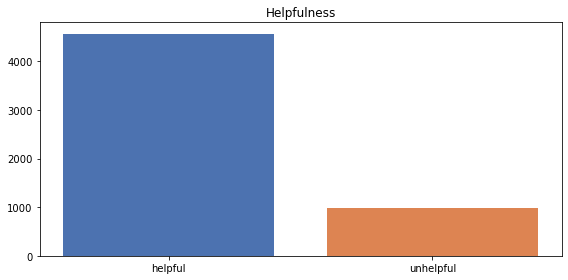

In [35]:
colors = sns.color_palette('deep')

plt.figure(figsize=(8,4), tight_layout=True)
plt.bar(x=['helpful', 'unhelpful'],
        height=reviews_3.value_counts(['label']),
        color=colors[:2])
plt.title('Helpfulness')
plt.show()

### Splitting the data into train and test set

In [36]:
target = reviews_3['label']
target =  target.values.tolist()
reviews_3.drop('label',inplace=True, axis=1)
X_train, X_test, y_train, y_test = train_test_split(reviews_3,target, test_size = 0.2, random_state = 1, stratify=target)

### Preprocessing the data

The above mentioned steps can be done implicitly by using sklearn's libraries like `TfidfVectorizer` and giving appropriate parameters. So, for this task, I have taken the direct approach.

In [37]:
# import the WordNet lemmatizer
from nltk.stem import WordNetLemmatizer
# define the function
def lemma_tokenizer(text):
    # use the standard scikit-learn tokenizer first
    standard_tokenizer = CountVectorizer().build_tokenizer()
    tokens = standard_tokenizer(text)
    # then use NLTK to perform lemmatisation on each token
    lemmatizer = WordNetLemmatizer()
    lemma_tokens = []
    for token in tokens:
        lemma_tokens.append(lemmatizer.lemmatize(token))
    return lemma_tokens

In [38]:
vectorizer = TfidfVectorizer(stop_words="english",tokenizer=lemma_tokenizer, min_df = 3, max_df = 0.85)

#Fitting the transformer on training data and transforming it 
X_train = vectorizer.fit_transform(X_train['Document(Title + Body)']) 

# Using the above fitted vectorizer to transform the test data
X_test = vectorizer.transform(X_test['Document(Title + Body)'])

terms = vectorizer.get_feature_names()
print("Vocabulary has %d distinct terms" % len(terms))

Vocabulary has 7555 distinct terms


## 2. Classification 

### Approach 1 - Logistic Regression

### Using the same classifiers for review helpful classification

In [39]:
target_categories = ["helpful","unhelpful"]

In [40]:
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
model_1=LogisticRegression()
logreg_cv=GridSearchCV(model_1,grid,cv=10)
logreg_cv.fit(X_train,y_train)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 10.0, 'penalty': 'l2'}
accuracy : 0.851444390214142


Accuracy of logistic regression is: 87.0 %


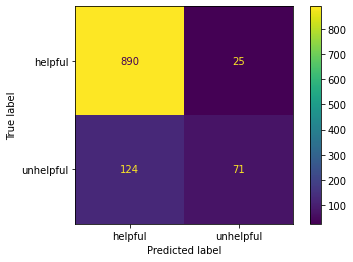

In [41]:
# Train model
model_1 = LogisticRegression(C= 10.0, penalty='l2')
model_1.fit(X_train, y_train)

#predict
y_pred_lr = model_1.predict(X_test)

print("Accuracy of logistic regression is:",round(accuracy_score(y_test,y_pred_lr),2)*100,"%")

# calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_lr)

# display it graphically
cmd = ConfusionMatrixDisplay(cm, display_labels=target_categories)
cmd.plot();

### Approach 2 - Random Forest Classifier

In [42]:
grid = { 
    'n_estimators': [100, 200, 500],
    'criterion' :['gini', 'entropy']
}
model_2=RandomForestClassifier()
rfc_cv=GridSearchCV(model_2,grid,cv=3)
rfc_cv.fit(X_train,y_train)

print("tuned hpyerparameters :(best parameters) ",rfc_cv.best_params_)
print("accuracy :",rfc_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'entropy', 'n_estimators': 100}
accuracy : 0.8582055253781476


Accuracy of random forest is: 87.0 %


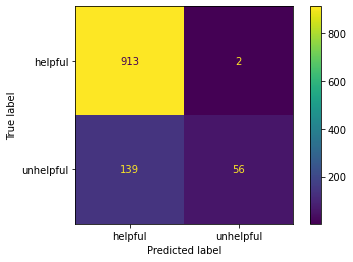

In [43]:
# Train model
model_2 = RandomForestClassifier(n_estimators=100,criterion="entropy")
model_2.fit(X_train, y_train)

#predict
y_pred_rf = model_2.predict(X_test)

print("Accuracy of random forest is:",round(accuracy_score(y_test,y_pred_rf),2)*100,"%")

# calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)
cmd = ConfusionMatrixDisplay(cm, display_labels=target_categories)
cmd.plot();

## Evaluation
### Comparing the classifiers:
We have used the following metrics to compare classifiers:
- **Accuracy:** A ratio of correctly predicted observation to the total observations
- **Precision:** Precision is the ratio of correctly predicted positive observations to the total predicted positive observations.
- **Recall:** Recall calculates how many of the Actual Positives our model captures through labeling it as Positive (True Positive)
- **F-1 Score:** The F1-score combines the precision and recall of a classifier into a single metric by taking their harmonic mean. It is primarily used to compare the performance of two classifiers. **F-1 score is genrerally used to compare classifier performance.**

In [44]:
print("\033[1mMetrics for Logistic Regression\033[0m")
print("\n")
print(classification_report(y_test, y_pred_lr, target_names=target_categories))

print("\n")
print("\033[1mMetrics for Random Forest\033[0m")
print("\n")
print(classification_report(y_test, y_pred_rf, target_names=target_categories))

Metrics for Logistic Regression


              precision    recall  f1-score   support

     helpful       0.88      0.97      0.92       915
   unhelpful       0.74      0.36      0.49       195

    accuracy                           0.87      1110
   macro avg       0.81      0.67      0.71      1110
weighted avg       0.85      0.87      0.85      1110



Metrics for Random Forest


              precision    recall  f1-score   support

     helpful       0.87      1.00      0.93       915
   unhelpful       0.97      0.29      0.44       195

    accuracy                           0.87      1110
   macro avg       0.92      0.64      0.69      1110
weighted avg       0.89      0.87      0.84      1110



### Results:

- Random forest has better accuracy than logistic regression for this task.
- The F1 score (a more balanced metric) proves the same.
- The recall score for helpful reviews is very good, meaning that most of the reviews model tags as helpful are actually helpful
- The recall score of the unhelpful reviews is less for both. Logistic Regression however beats Random Forest in this case with a recall of 39% compared to the 28% recall of Random Forest.
- Precision score for Random Forest is better for both the classes. It is interesting to note that the precision score of the unhelpful reviews is better than that of helpful reviews.


### Plotting the ROC Curve for helpfulness review classification
The Receiver Operator Characteristic (ROC) curve is an evaluation metric for binary classification problems. It is a probability curve that plots the TPR against FPR at various threshold values and essentially separates the ‘signal’ from the ‘noise’. The Area Under the Curve (AUC) is the measure of the ability of a classifier to distinguish between classes and is used as a summary of the ROC curve.

The higher the AUC, the better the performance of the model at distinguishing between the positive and negative classes.

In [45]:
# Comparising LR and RF based on ROC AUC 
pred_prob1 = model_1.predict_proba(X_test)
pred_prob2 = model_2.predict_proba(X_test)


auc_1 = roc_auc_score(y_test, pred_prob1[:,1])
auc_2 = roc_auc_score(y_test, pred_prob2[:,1])

auc_scores = {}

print('AUC_Score for LR Classifier: %.2f%%' % (auc_1 * 100))
print('AUC_Score for RF Classifier: %.2f%%' % (auc_2 * 100))

auc_scores['LR'] = auc_1
auc_scores['RF'] = auc_2

AUC_Score for LR Classifier: 83.50%
AUC_Score for RF Classifier: 86.64%


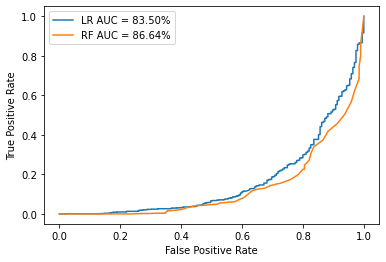

In [46]:
#Plotting the ROC curves 

fpr_1, tpr_1, _ = roc_curve(y_test,pred_prob1[:,1], pos_label = 'helpful')
fpr_2, tpr_2, _ = roc_curve(y_test,pred_prob2[:,1], pos_label = 'helpful')

plt.plot(fpr_1,tpr_1, label='LR AUC = %.2f%%'%(auc_scores['LR']*100))
plt.plot(fpr_2,tpr_2, label='RF AUC = %.2f%%'%(auc_scores['RF']*100))


plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()


**We can see that the both the classifiers perform similar but the random forest is slightly better at this task.**

### Comparison of two tasks based on above metrics
- Both the tasks are binary classification tasks. In order to compare them, I have used the same classifiers with same parameters.
- The first task of sentiment analysis has fairly balanced data while the helpfulness classification has very less data points to show unhelpful reviews. 
- This led to both the classifiers perform better on task 1 (AUC 93%) compared to task 2 (AUC 84%). 
- For task 2, in order to tackle class imbalance, I have used `stratify` parameter during train-test split to improve classification accuracy to some extent.

### Conclusion
We can conclude that document classification tasks need proper preprocessing before being given as input to classification algorithms. The classifier accuracy isn't a wholistic metric to evaluate its performance. F1 score gives a way to compare two classifiers in a balanced way. For an indepth analysis, checking precision and recall helps us get a better idea about which errors are acceptable per task. The reason for poor results of helpfulness also stems from the complexity of task. While classifying a review as postive and negative is fairly straightforward and can be identified with the help of some commonly occuring postive and negative verbs, classifying review helpfulness is more difficult. Even if the underlying complexity, the machine learning algorithms perform pretty well for the given tasks.

### Future Work
The class with lesser number of samples usually has poor accuracy but it can be improved by techiques like oversampling or better classifiers and this can be done as future work. Along with that, deep learning techniques can be used since we do not have a lot of features in the data. 